### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

### Auxillary Functions


In [2]:
def visualize_data(matrix):
    if matrix.ndim == 1:
        matrix = matrix.reshape(-1, 1)
    table = pd.DataFrame(matrix)
    display(table.head(10).style.hide(axis="index").hide(axis="columns"))
    if len(matrix) > 10:
        print('...')

In [3]:
def calculate_mse(target, predicted):

    target = np.array(target)
    predicted = np.array(predicted)
    mse = np.mean((target - predicted) ** 2)
    print("MSE: ", mse)

###  Datasets


In [4]:
data_size = 60
np.random.seed(42)
X = np.linspace(0, 2 * np.pi, data_size).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.randn(data_size) * 0.1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


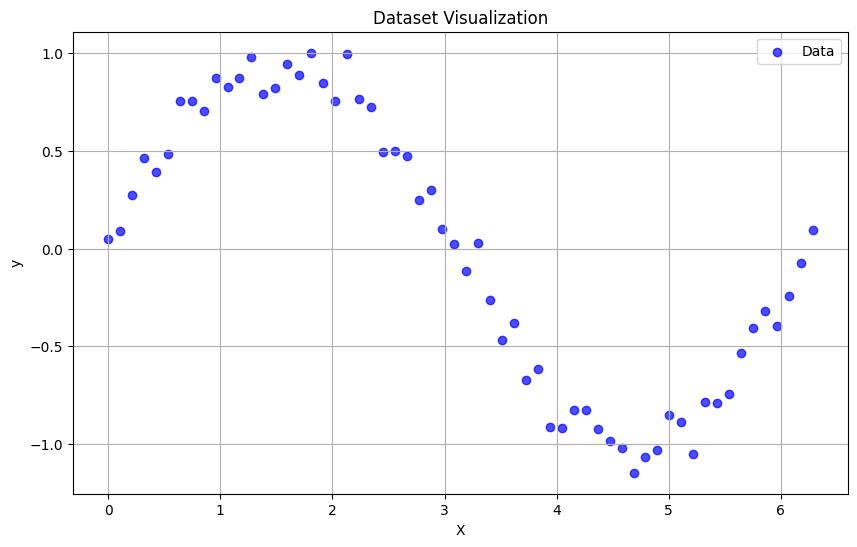

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data', alpha=0.7)
plt.title('Dataset Visualization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [6]:
visualize_data(X_train)

3.301335
0.319484
5.537723
1.810409
0.851957
0.638968
4.259787
0.425979
4.579271
2.023399


...


In [7]:
visualize_data(y_train)

0.026164
0.466380
-0.746004
1.002855
0.705623
0.754289
-0.825465
0.389797
-1.021263
0.758082


...


In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (48, 1)
X_test shape: (12, 1)
y_train shape: (48,)
y_test shape: (12,)


In [9]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (48, 1)
X_test shape: (12, 1)
y_train shape: (48, 1)
y_test shape: (12, 1)


### 1 - Simple Linear Regression Model

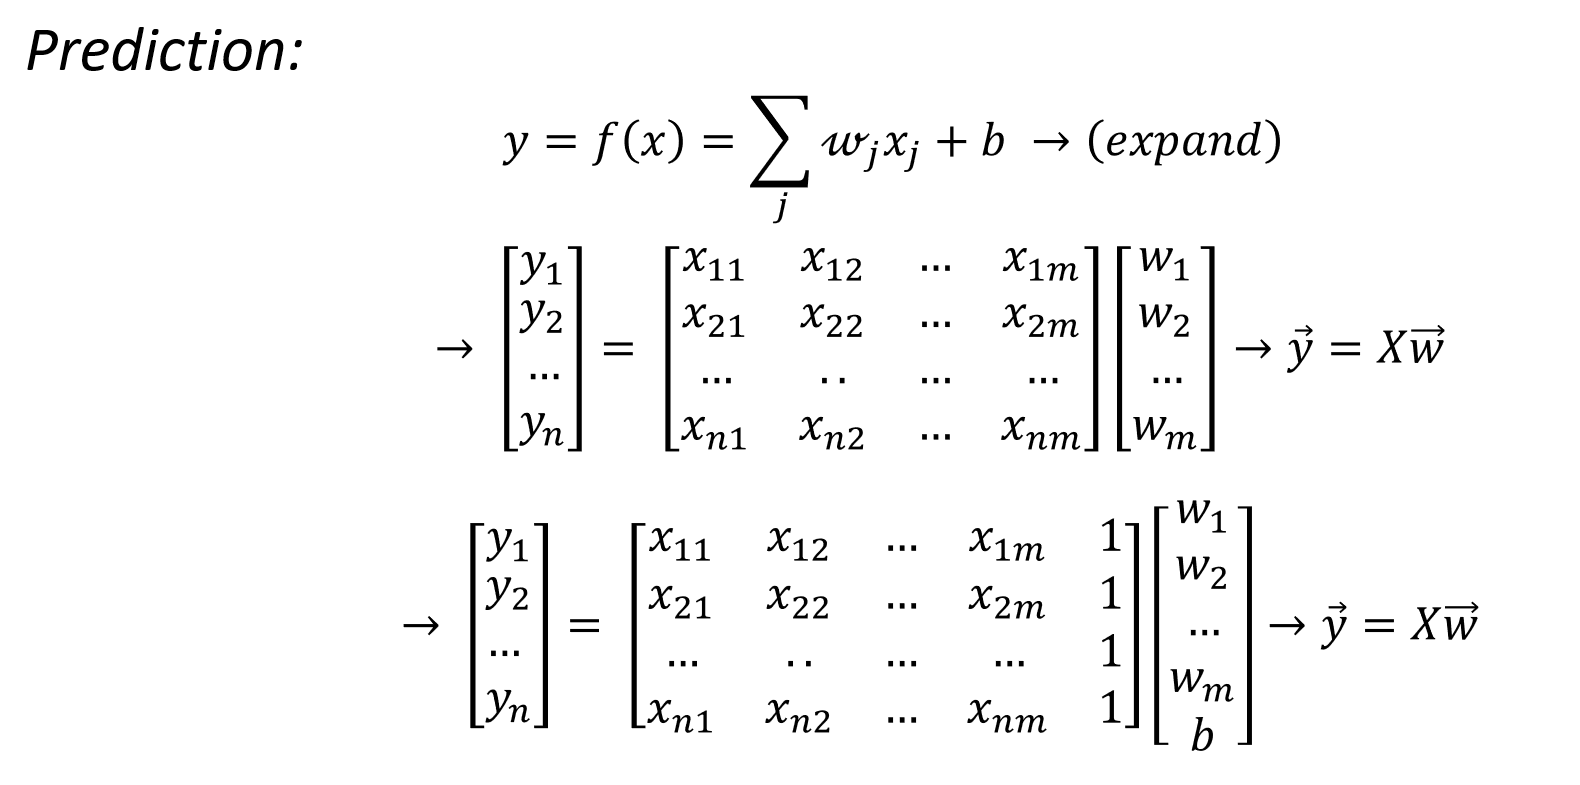

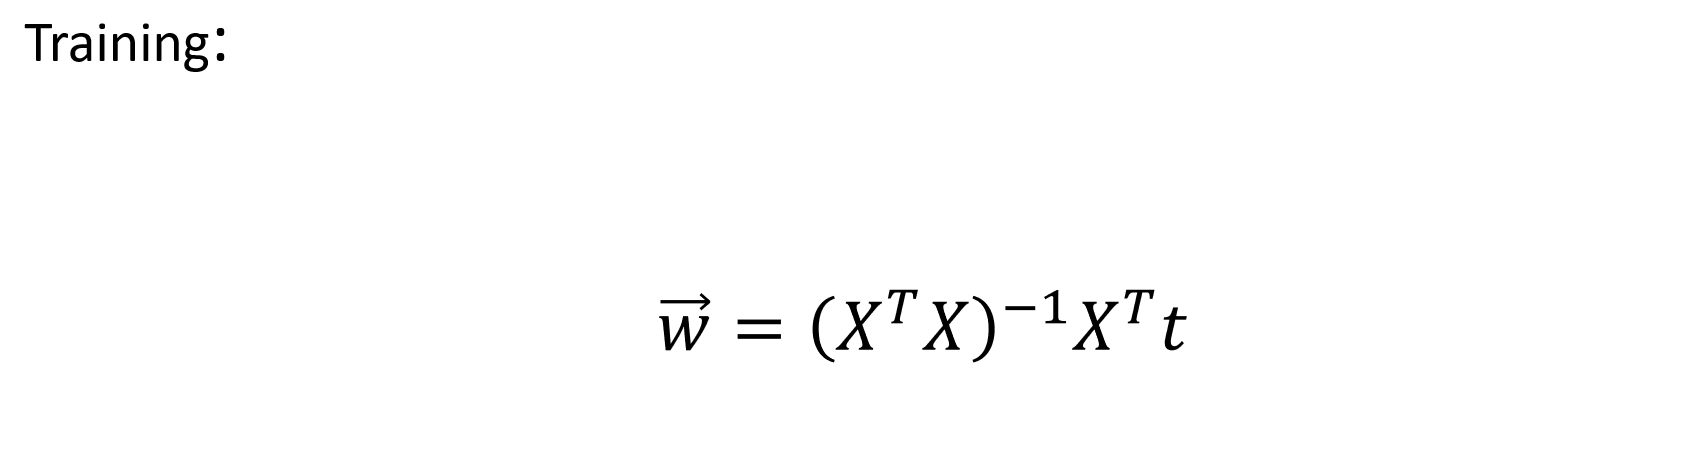

In [10]:
class DirectLinearRegression:
    def __init__(self):
        self.w = None

    def train(self, X, t):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        self.w = np.linalg.inv(X.T @ X) @ X.T @ t
        print("Training Complete.")

    def predict(self, X):
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        return X @ self.w

In [11]:
model_1 = DirectLinearRegression()
model_1.train(X=X_train, t= y_train)

Training Complete.


In [12]:
model_1_predictions = model_1.predict(X = X_test)
visualize_data(model_1_predictions)

0.956584
0.797407
-0.189490
-0.476008
0.542724
-0.762527
-0.093984
-0.571514
0.574559
-0.858033


...


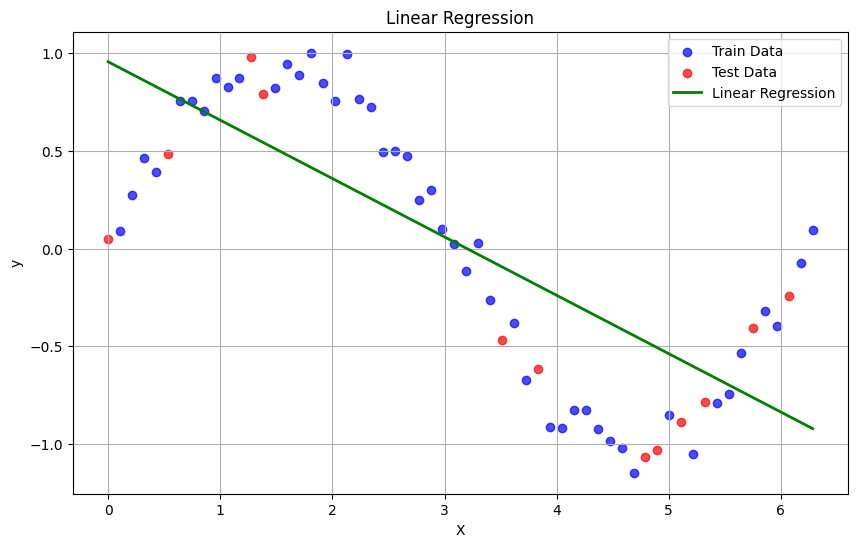

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)


X_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y_plot_pred = model_1.predict(X_plot)

plt.plot(X_plot, y_plot_pred, color='green', label='Linear Regression', linewidth=2)
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [14]:
calculate_mse(y_test, model_1_predictions)

MSE:  0.22705746799711793


##  2 - Linear Regression Model With Polynomial Function

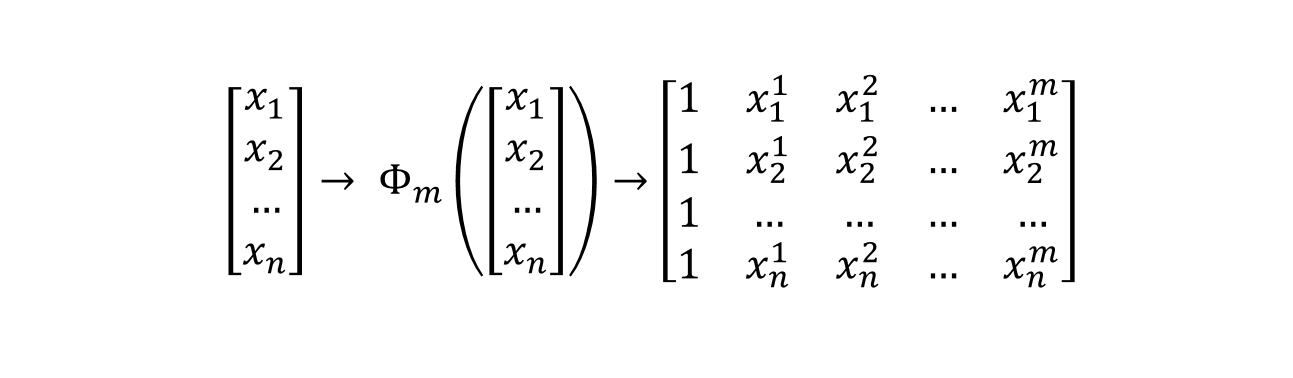

In [15]:
visualize_data(X_test)

0.000000
0.532473
3.833808
4.792260
1.384431
5.750712
3.514324
5.111744
1.277936
6.070196


...


In [16]:
visualize_data(X_train)

3.301335
0.319484
5.537723
1.810409
0.851957
0.638968
4.259787
0.425979
4.579271
2.023399


...


In [17]:
phi = PolynomialFeatures(degree=3)
X_train_poly = phi.fit_transform(X_train)
X_test_poly = phi.transform(X_test)


visualize_data(X_train_poly)

1.000000,3.301335,10.898810,35.980621
1.000000,0.319484,0.102070,0.032610
1.000000,5.537723,30.666372,169.821863
1.000000,1.810409,3.277582,5.933765
1.000000,0.851957,0.725831,0.618377
1.000000,0.638968,0.408280,0.260878
1.000000,4.259787,18.145782,77.297161
1.000000,0.425979,0.181458,0.077297
1.000000,4.579271,20.969720,96.026022
1.000000,2.023399,4.094142,8.284082


...


In [18]:
visualize_data(X_test_poly)

1.000000,0.000000,0.000000,0.000000
1.000000,0.532473,0.283528,0.150971
1.000000,3.833808,14.698084,56.349630
1.000000,4.792260,22.965756,110.057872
1.000000,1.384431,1.916648,2.653467
1.000000,5.750712,33.070688,190.180003
1.000000,3.514324,12.350473,43.403564
1.000000,5.111744,26.129927,133.569494
1.000000,1.277936,1.633120,2.087023
1.000000,6.070196,36.847279,223.670206


...


In [19]:
class DirectLinearRegression:
    def __init__(self):
        self.w = None

    def train(self, X, t):

        self.w = np.linalg.inv(X.T @ X) @ X.T @ t
        print("Training Complete.")

    def predict(self, X):
        return X @ self.w



In [20]:
model = DirectLinearRegression()
model.train(X_train_poly, y_train)

Training Complete.


In [21]:
predictions = model.predict(X_test_poly)
visualize_data(predictions)


-0.154753
0.599577
-0.597575
-1.024316
0.991018
-0.597016
-0.350272
-1.000985
0.987562
-0.180065


...


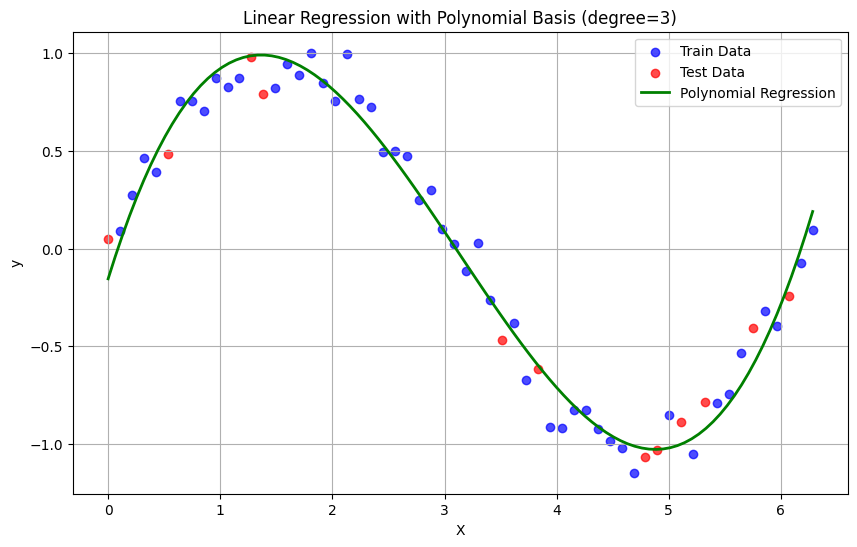

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)


X_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
X_plot_poly = phi.transform(X_plot)
y_plot_pred = model.predict(X_plot_poly)

plt.plot(X_plot, y_plot_pred, color='green', label='Polynomial Regression', linewidth=2)
plt.title('Linear Regression with Polynomial Basis (degree=3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [23]:
calculate_mse(y_test, predictions)

MSE:  0.015382979483542216


## 3 - Linear Regression Model With Gradient Descent

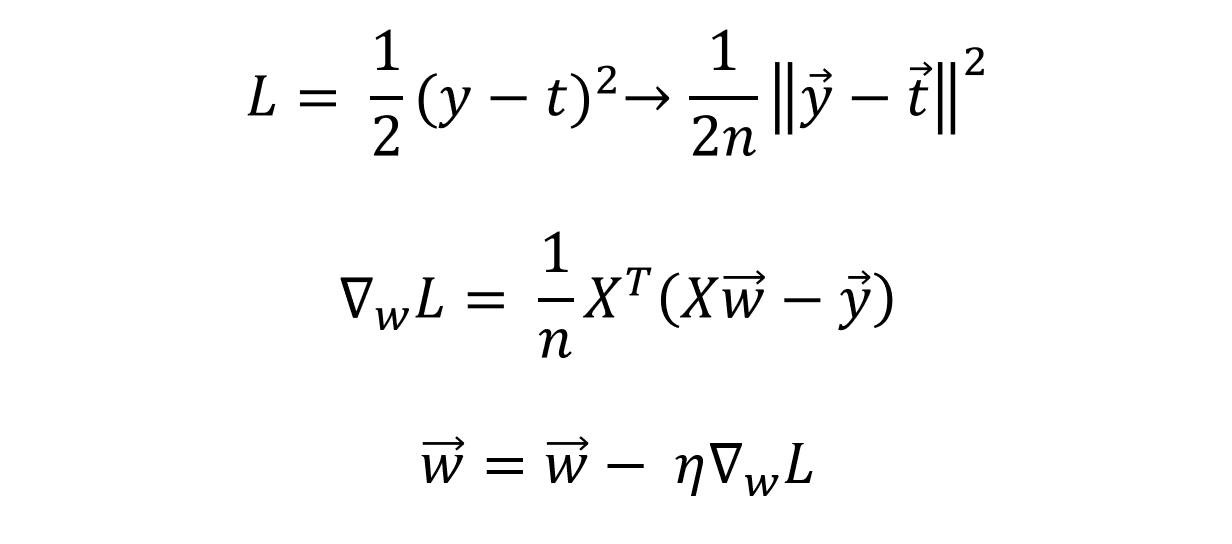

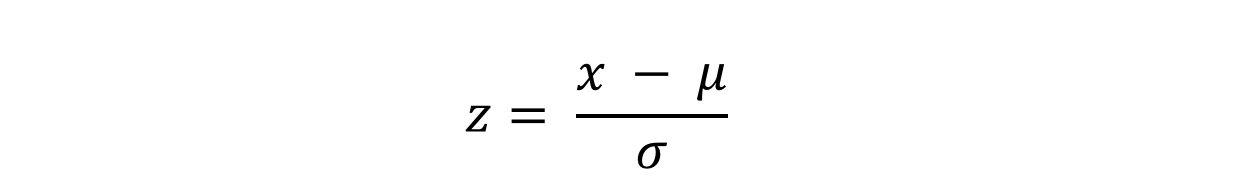

In [24]:
class LinearRegression:
    def __init__(self):
        self.w = None
        self.scaler = StandardScaler()

    def train(self, X, y,learning_rate = 0.1,epochs = 100, batch_size=5, add_bias=True):

        self.add_bias = add_bias

        if self.add_bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        X = self.scaler.fit_transform(X)

        self.w = np.zeros((X.shape[1], 1))
        
        n = X.shape[0]

        for epoch in range(epochs):
            indices = np.arange(n)
            np.random.shuffle(indices)
            X = X[indices]
            y = y[indices]

            for start in range(0, n, batch_size):
                end = start + batch_size
                X_batch = X[start:end]
                y_batch = y[start:end]

                predictions = X_batch @ self.w
                errors = predictions - y_batch
                gradient = (X_batch.T @ errors) / X_batch.shape[0]
                
                self.w = self.w - learning_rate * gradient

        print("Model Trained.")
    
    def predict(self, X):
        if self.add_bias:
            X = np.hstack((np.ones((X.shape[0], 1)), X))
        
        X = self.scaler.transform(X)
    
        return X @ self.w


In [25]:
phi = PolynomialFeatures(degree=3)
X_train_poly = phi.fit_transform(X_train)
X_test_poly = phi.transform(X_test)

In [26]:
model_3 = LinearRegression()
model_3.train(X=X_train_poly, y= y_train, learning_rate = 0.01, epochs=10000, batch_size = 10, add_bias=False)

Model Trained.


In [27]:
model_3_predictions = model_3.predict(X = X_test_poly)
visualize_data(model_3_predictions)

0.508302
0.726556
-0.477493
-0.793960
0.710767
-0.675111
-0.315307
-0.814152
0.732858
-0.498717


...


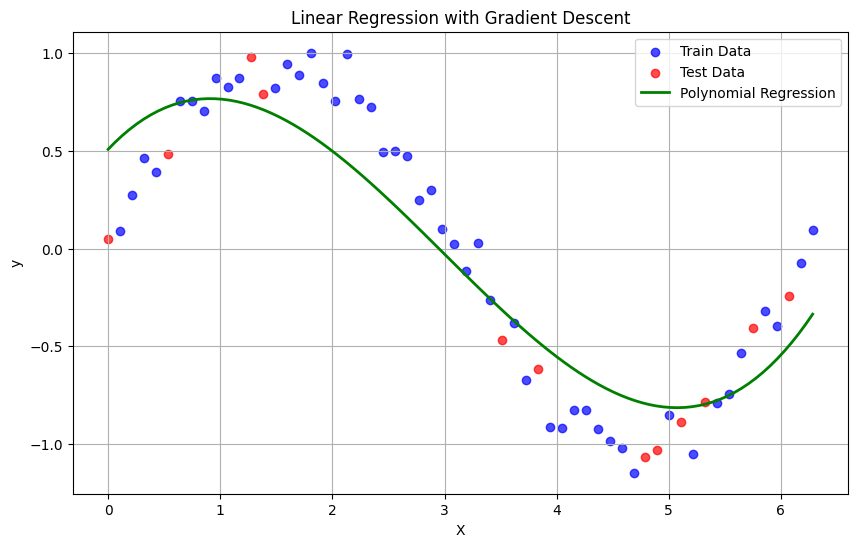

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.7)
plt.scatter(X_test, y_test, color='red', label='Test Data', alpha=0.7)


X_plot = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
X_plot_poly = phi.transform(X_plot)
y_plot_pred = model_3.predict(X_plot_poly)

plt.plot(X_plot, y_plot_pred, color='green', label='Polynomial Regression', linewidth=2)
plt.title('Linear Regression with Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

In [29]:
calculate_mse(y_test, model_3_predictions)

MSE:  0.054182429671943345
